In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from uedge import *
from uedge.hdf5 import *
#import plotmesh as pm
from uetools import Case
from uedge.gridue import write_gridue
from Forthon import gchange

UEDGE configuration file /home/sseethalla25/.uetoolsrc read.


# Create Case from YAML

In [2]:
c = Case('input_coarse.yaml')

No diffusivity-file supplied: reading from save-file ".../jupyter/force_balance_test/fb_puff_coarse=1e-2_last_ii2.hdf5"
  User-specified diffusivities read from HDF5 file ".../jupyter/force_balance_test/fb_puff_coarse=1e-2_last_ii2.hdf5"
UETOOLS-style save successfully restored from .../jupyter/force_balance_test/fb_puff_coarse=1e-2_last_ii2.hdf5

*** UEDGE arrays populated: Warning, case may noy be fully converged ***
fnrm without preconditioning: 65.4



In [ ]:
api.apidir # points to impurity files for fixed fraction (mist.dat) & force-balance (b2frates)


array([b'/home/sseethalla25/UETOOLS-Reactor/uedge-rates/api                                                                      '],
      dtype='|S120')

In [4]:
c.populate()
print("dif_use, kye_use, kyi_use around SOL:", bbb.dif_use[30, :, 0][1], bbb.kye_use[30, :][1], bbb.kyi_use[30, :][1])


*** UEDGE arrays populated: WARNING, case NOT converged ***
fnrm without preconditioning: 9.79e+19

dif_use, kye_use, kyi_use around SOL: 0.0 0.0 0.0


# Converge

In [3]:
com.nxleg[0] = [16,24] # No cells in inner/outer leg
com.nxcore[0] = [7,5] # No cells in inner/outer core region
com.nycore[0]=8        # Number of radial zones in 1st core of plasma
com.nysol[0]=14        # Number of radial zones in 1st SOL


In [53]:
com.nxleg[0], com.nxcore[0], com.nycore[0], com.nysol[0], bbb.igspsorrb[:,1]

(array([16, 24]),
 array([7, 5]),
 np.int64(8),
 np.int64(14),
 array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [66]:
bbb.npltsor=1     #number sources on plates; must be <= 10
# bbb.sputtr = 1
# bbb.sputtrb=1
# Puffs: indices correspond to source # - limited by npltsor

# Outer wall
# 1=D,2=Ne,3=C
bbb.igspsorrb[:,0] =   [3,   0, 0, 0, 0, 0, 0, 0, 0, 0]  # Puffed species index (BASIS INDICES)
bbb.igasrb[:,0]=      [10,   0, 0, 0, 0, 0, 0, 0, 0, 0]  # Gas currents from outer wall [Amp]
bbb.ygasrb[:,0]=      [0.0,   0, 0, 0, 0, 0, 0, 0, 0, 0]  # Location of wall source: origin set by issorlb
bbb.wgasrb[:,0]=      [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]  # Total Cosine widths of source
# bbb.ngsp = 3


In [22]:
print(com.mcfilename)

[b'b2frates_solpsiter_Ne                                                                                                                                                                                                                                           '
 b'b2frates_solpsiter_C_new'
 b'b2frates                                                                                                                                                                                                                                                        '
 b'b2frates                                                                                                                                                                                                                                                        '
 b'b2frates                                                                                                                                                                                 

In [56]:
c.populate()
c.about.uedge_setup()


*** UEDGE arrays populated: WARNING, case NOT converged ***
fnrm without preconditioning: 6.13e+11

The UEDGE set-up contains:
  - 2 hydrogenic species:
    - DT ions
    - Inertial DT atoms
  - 2 impurity species:
    - Charge-state resolved Ne20
      - Fully force-balance
    - Charge-state resolved C12
      - Fully force-balance

               0      1      2      3      4      5      6      7      8      9      10     11     12     13     14     15     16     17 
Ion array : [ DT+ ,  DT0 ,  Ne+1,  Ne+2,  Ne+3,  Ne+4,  Ne+5,  Ne+6,  Ne+7,  Ne+8,  Ne+9, Ne+10,  C+1 ,  C+2 ,  C+3 ,  C+4 ,  C+5 ,  C+6 ]
Gas array : [  D0 ,  Ne0 ,   C0 ]


In [ ]:
com.ngsp = 3
com.nzdf=2
com.nzsp[1] = 6 # number of charge states used
bbb.ngbackg[2]=1e10
bbb.ingb=2
# bbb.istgcon[1]=1
# bbb.tgas[1]=1
# bbb.rcxighg=0
bbb.n0g[2]=1.e18
bbb.minu[12:18]=[12, 12, 12, 12, 12, 12]
bbb.ziin[12:18]=[1, 2, 3, 4, 5, 6]
bbb.znuclin[12:18]=[6, 6, 6, 6, 6, 6]
bbb.n0[12:18]=[1.e17, 1.e17, 1.e17, 1.e17, 1.e17, 1.e17]
bbb.nzbackg=1.e9
bbb.inzb=2
bbb.ismctab=2
com.mcfilename[1]="b2frates_solpsiter_C_new"
bbb.isnicore[12:18]=3
bbb.curcore[12:18]=0
bbb.isnwcono[12:18]=[2, 2, 2, 2, 2, 2]
bbb.isnwconi[12:18]=[2, 2, 2, 2, 2, 2]
for i in range(8,18):
    bbb.nis[:,:,i] = np.ones((54, 24))*1.263808324858014e+18

bbb.ngs[:,:,2] = np.ones((54, 24))*5.758619528805603e+10

In [10]:
np.mean(bbb.nis)

np.float64(1.263808324858014e+19)

In [ ]:
# bbb.nzbackg="1.e13" # goal: 1e3
# bbb.ngbackg[1]="1e9" # goal: 1e9
# bbb.isbcwdt=1
# bbb.icntnunk=0;bbb.issfon=0;bbb.ftol=1e20;bbb.exmain();bbb.issfon=1;bbb.ftol=1e-8 # have to run this to change model
bbb.isbcwdt=1
bbb.dtphi = 1e9 # I think dtphi<1e10 makes it time dependant. Useful to take an initial time-step
c.converge(savefname='fb_carbon_neon_init3', dtreal=1e-10)

Requested save-path ../solutions not found, writing to cwd!
*----------------------------------------------------------*
 Need to take initial step with Jacobian; trying to do here 
*----------------------------------------------------------*
---------------------------------------------------------------
*** Number of time-step changes = 1 New time-step: 1.00E-10 ***
---------------------------------------------------------------
Intermediate solution written to ./fb_carbon_neon_init3_last_ii2.hdf5
 Inner iteration #1 

Intermediate solution written to ./fb_carbon_neon_init3_last_ii2.hdf5
 Total time = 1.0000E-10; Timestep = 1.0000E-10 

 Inner iteration #2 

Intermediate solution written to ./fb_carbon_neon_init3_last_ii2.hdf5
 Total time = 2.0000E-10; Timestep = 1.0000E-10 

 Inner iteration #3 

Intermediate solution written to ./fb_carbon_neon_init3_last_ii2.hdf5
 Total time = 3.0000E-10; Timestep = 1.0000E-10 

 Inner iteration #4 

Intermediate solution written to ./fb_carbon_ne

In [41]:
bbb.ni[17,10,11]

np.float64(1.2631100327673178e+18)

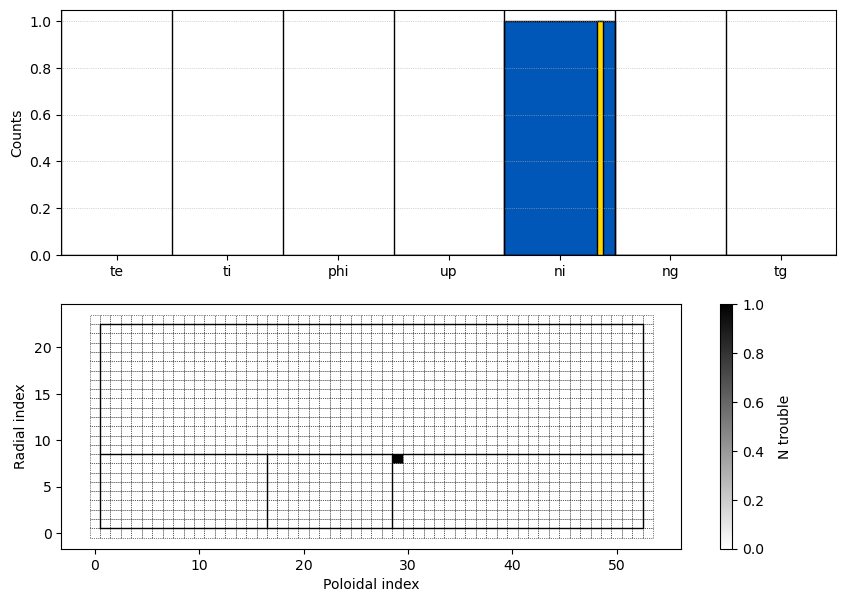

In [70]:
c.solver.failureanalysis('fb_carbon_neon_init3_last_ii2.hdf5', N=slice(-2, -1));


*** UEDGE arrays populated: WARNING, case NOT converged ***
fnrm without preconditioning: 2.44e+11

1.0201499249276822e+21 7.1746857562458856e+16
0


/home/sseethalla25/UETOOLS-Reactor/jupyter/force_balance_test/plot_sinksource.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


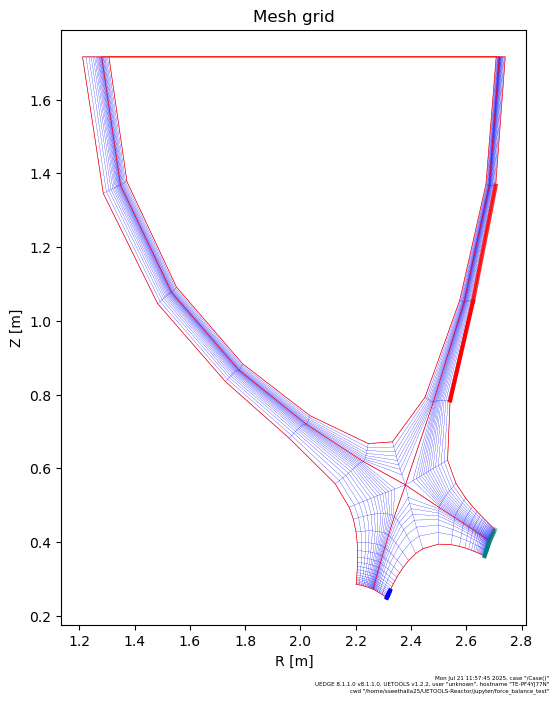

In [56]:
import plot_sinksource
import importlib
importlib.reload(plot_sinksource)
c.populate()
plot_sinksource.plot_sinksource(c)


In [ ]:
import subprocess
bbb.isbcwdt=0
# proc = subprocess.Popen(['caffeinate', "-d", "-u", "-i", "-s"])

try:
    c.converge(savefname='first_force_balance', dtreal=1e-10)
    os.system("printf '\7'") #macos plays sound after converging
finally:
    # Terminate caffeinate
    proc.terminate()

In [ ]:
import subprocess
proc = subprocess.Popen(['caffeinate', "-d", "-u", "-i", "-s"])

try:
    c.continuation_solve('afracs', 1e-2, savedir='impu_up', dtreal=1e-10, ftol=1e-2)
    os.system("printf '\7'") #macos plays sound after converging
finally:
    # Terminate caffeinate
    proc.terminate()

In [ ]:
c.solver.convergenceanalysis('reconverged_v12_p3.93_n2.38_imp1e4_dp0.06_kep0.06_kip0.0226_last_ii2.hdf5');

# Inner plate

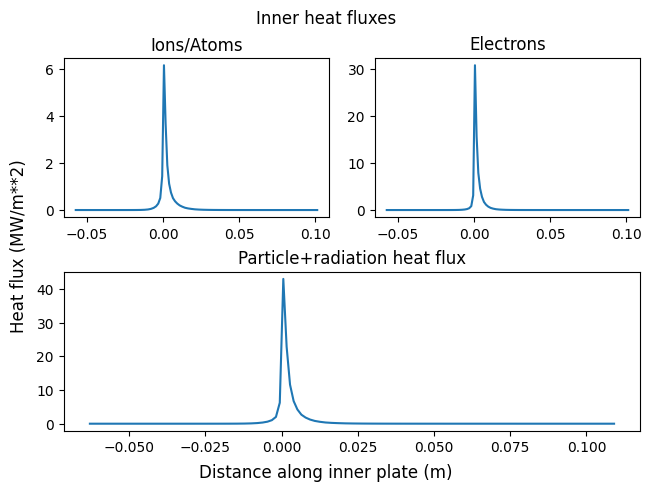

In [3]:
# %matplotlib widget
bbb.fqp=0
bbb.plateflux(); #internally calculated fluxes (postprocessing)

fig, axs = plt.subplot_mosaic(
    [['TopLeft', 'TopRight'],
     ['Bottom', 'Bottom']],
    layout='constrained',  # Automatically adjust layout
    width_ratios=[1, 1],   # Equal width for the top plots
)
fig.suptitle('Inner heat fluxes')
fig.supxlabel('Distance along inner plate (m)')
fig.supylabel('Heat flux (MW/m**2)')
# axs['TopRight'].set_xlabel("Distance along inner plate (m)")
#axs['TopRight'].set_ylabel("feex (W)")
axs['TopRight'].set_title("Electrons")
axs['TopRight'].plot(com.yylb[1:-1],bbb.sdelb[1:-1,0]*1e-6)

# axs['TopLeft'].set_xlabel("Distance along inner plate (m)")
# axs['TopLeft'].set_ylabel("Heat flux (MW/m**2)")
axs['TopLeft'].set_title("Ions/Atoms")
axs['TopLeft'].plot(com.yylb[1:-1],bbb.sdilb[1:-1]*1e-6) #polodal east field area

# axs['Bottom'].set_xlabel("Distance along inner plate (m)")
# axs['Bottom'].set_ylabel("Heat flux [MW/m**2]")
axs['Bottom'].set_title("Particle+radiation heat flux")
axs['Bottom'].plot(com.yylb,1.e-6*(bbb.sdtlb+bbb.sdrlb))
plt.show()

# Outer plate

<Figure size 640x480 with 0 Axes>

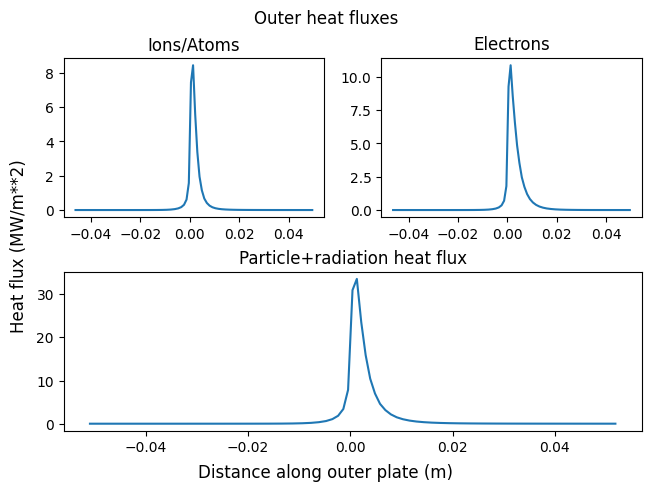

array([33.50015493])

In [6]:
# total convective and conductive heat flux
# 2nd char: e for energy n for particle
bbb.fqp=0
bbb.plateflux(); #internally calculated fluxes (postprocessing)

plt.figure()
fig, axs = plt.subplot_mosaic(
    [['TopLeft', 'TopRight'],
     ['Bottom', 'Bottom']],
    layout='constrained',  # Automatically adjust layout
    width_ratios=[1, 1],   # Equal width for the top plots
)
fig.suptitle('Outer heat fluxes')
fig.supxlabel('Distance along outer plate (m)')
fig.supylabel('Heat flux (MW/m**2)')
# axs['TopRight'].set_xlabel("Distance along inner plate (m)")
#axs['TopRight'].set_ylabel("feex (W)")
axs['TopRight'].set_title("Electrons")
axs['TopRight'].plot(com.yyrb[1:-1],bbb.sderb[1:-1,0]*1e-6)

# axs['TopLeft'].set_xlabel("Distance along inner plate (m)")
# axs['TopLeft'].set_ylabel("Heat flux (MW/m**2)")
axs['TopLeft'].set_title("Ions/Atoms")
axs['TopLeft'].plot(com.yyrb[1:-1],bbb.sdirb[1:-1,0]*1e-6) #polodal east field area


# axs['Bottom'].set_xlabel("Distance along inner plate (m)")
# axs['Bottom'].set_ylabel("Heat flux [MW/m**2]")
axs['Bottom'].set_title("Particle+radiation heat flux")
axs['Bottom'].plot(com.yyrb,1.e-6*(bbb.sdtrb+bbb.sdrrb))
plt.show()
max(1.e-6*(bbb.sdtrb+bbb.sdrrb))

In [80]:
np.sum( (bbb.sdtrb+bbb.sdrrb)) / 1e6

np.float64(25.673051490542424)

# 2D Plots



*** UEDGE arrays populated: WARNING, case NOT converged ***
fnrm without preconditioning: 1.33e+09



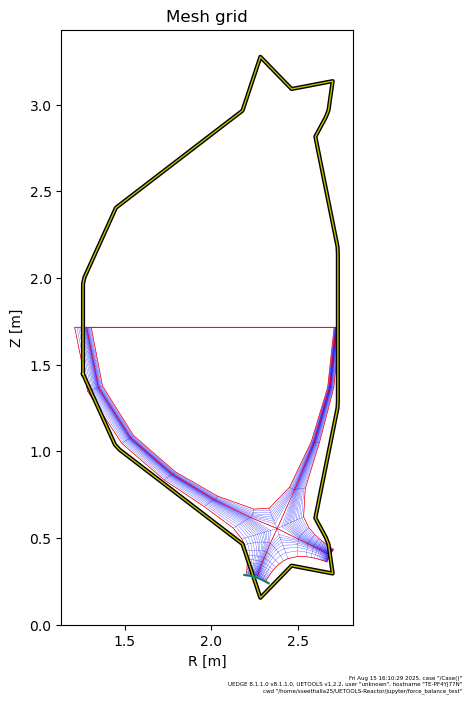

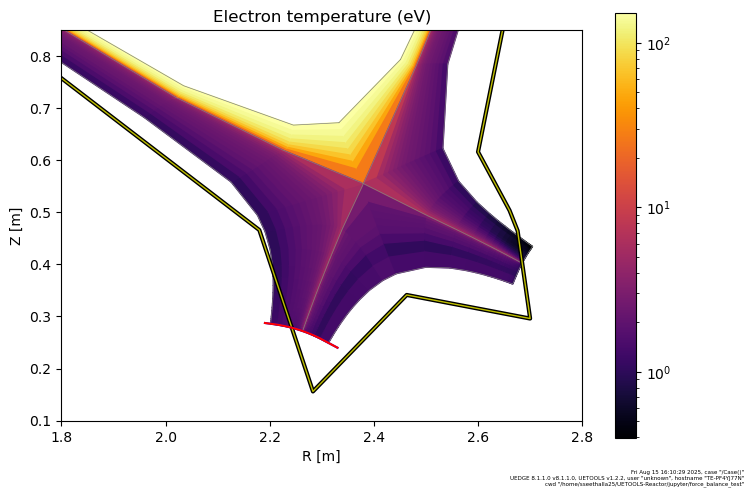

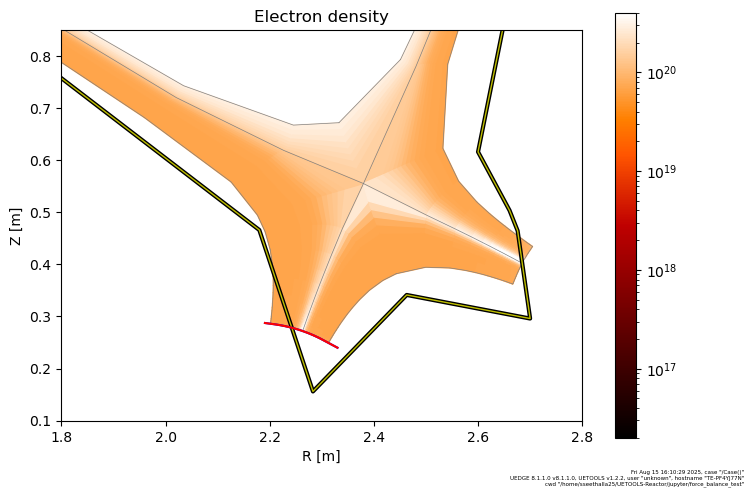

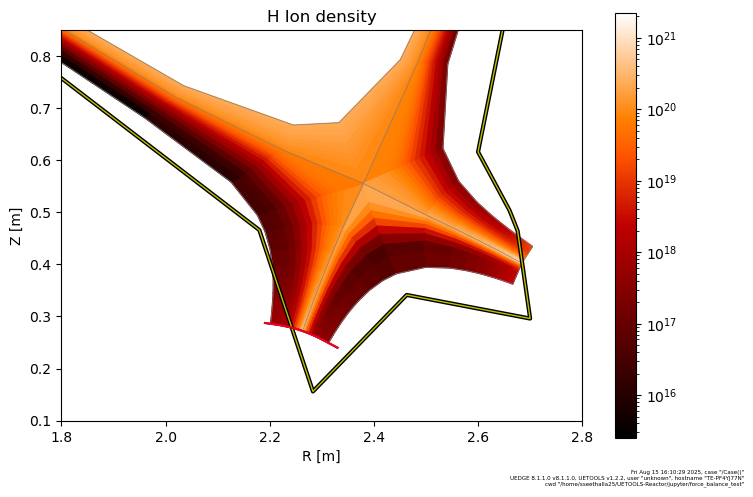

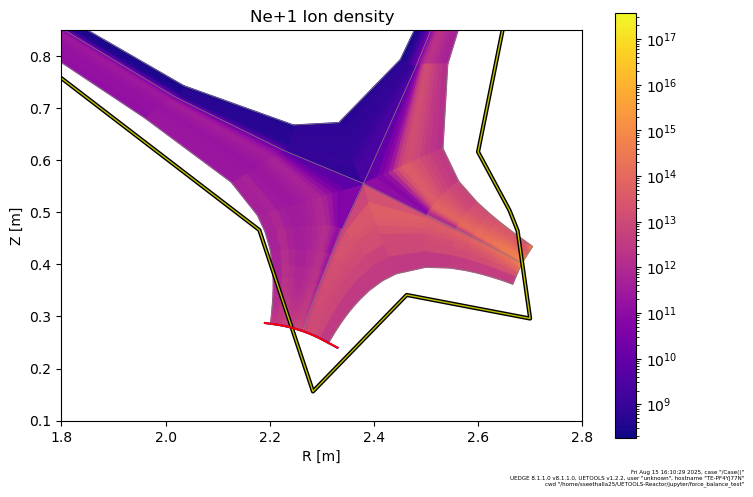

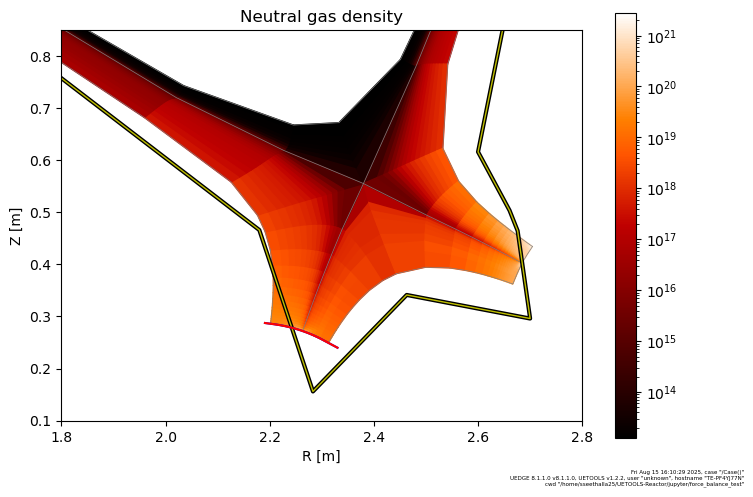

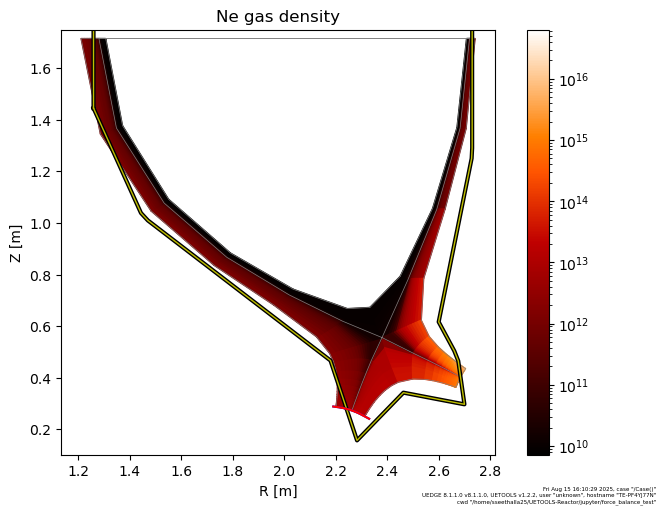

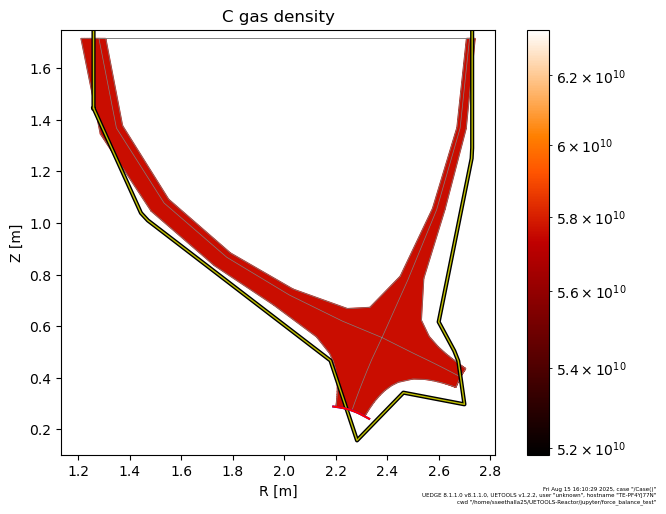

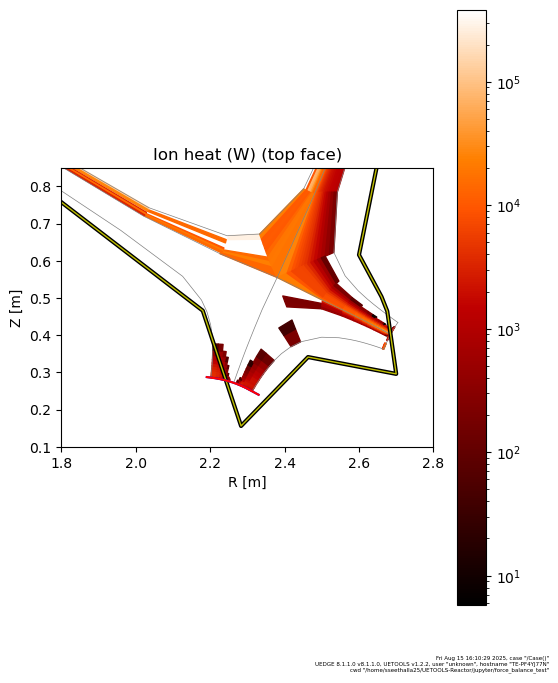

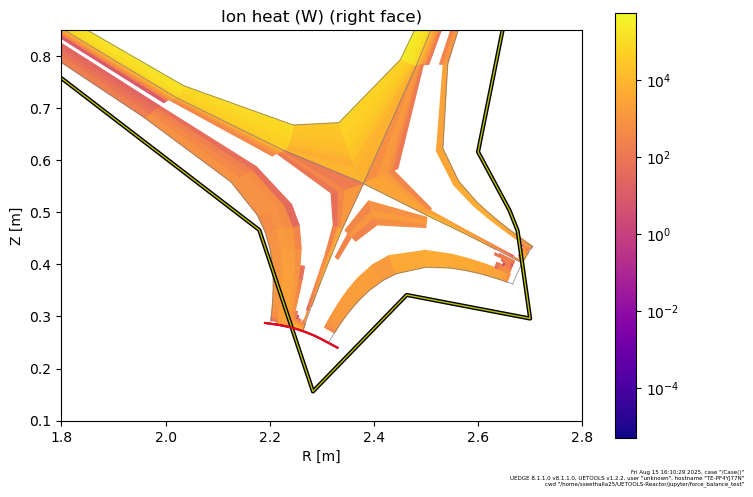

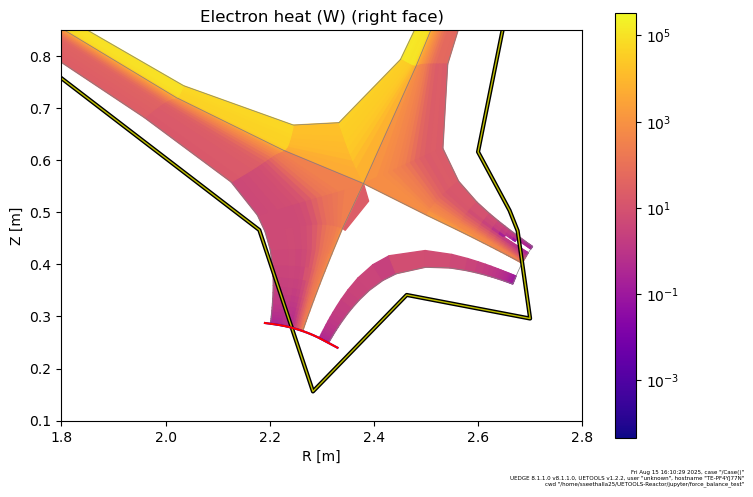

In [77]:
#TODO: neutral pressure
#TODO: compare Figure 16.11 in Stangeby
import seaborn as sns
sns.reset_orig()
c = Case()
c.populate()
c.plot.grid(linewidth=0.1, #grid plot
   vessel=True, 
   plates=True, 
   platecolor=['gold','teal'], 
   lcfs=True, 
   lcfscolor='r', 
   linecolor='b',
   title='Mesh grid',
#    aspect="auto"
  );
c.plot.mesh(
    bbb.te/bbb.ev,
    log=True,
    cmap='inferno',
    title='Electron temperature (eV)',
    figsize=(7,5), 
    xlim=(1.8, 2.8), 
    ylim=(0.1,0.85), 

);
c.plot.mesh(
    bbb.ne, 
    log=True, 
    cmap='gist_heat',
    title='Electron density',
    figsize=(7,5), 
    xlim=(1.8, 2.8), 
    ylim=(0.1,0.85), 
    zrange=(4e20, 2e16)
);
c.plot.mesh(
    bbb.ni[:, :, 0], 
    log=True, 
    cmap='gist_heat',
    title='H Ion density',
    figsize=(7,5), 
    xlim=(1.8, 2.8), 
    ylim=(0.1,0.85), 
);
c.plot.mesh(
    bbb.ni[:, :, 2], 
    log=True, 
    cmap='plasma',
    title='Ne+1 Ion density',
    figsize=(7,5), 
    xlim=(1.8, 2.8), 
    ylim=(0.1,0.85), 
);
c.plot.mesh(
    bbb.ng[:, :, 0],
    log=True, 
    cmap='gist_heat',
    title='Neutral gas density',
    figsize=(7,5), 
    xlim=(1.8, 2.8), 
    ylim=(0.1,0.85), 

);
c.plot.mesh(
    bbb.ng[:,:,1], 
    log=True, 
    cmap='gist_heat',
    title='Ne gas density',
    figsize=(7,5), 
    # xlim=(1.8, 2.8), 
    ylim=(0.1,1.75), 
);
c.plot.mesh(
    bbb.ng[:,:,2], 
    log=True, 
    cmap='gist_heat',
    title='C gas density',
    figsize=(7,5), 
    # xlim=(1.8, 2.8), 
    ylim=(0.1,1.75), 
);
c.plot.mesh(
    bbb.feix, 
    log=True, 
    cmap='gist_heat',
    title='Ion heat (W) (top face)',
    xlim=(1.8, 2.8), 
    ylim=(0.1,0.85), 
);
c.plot.mesh(
    bbb.feiy, 
    log=True, 
    cmap='plasma',
    title='Ion heat (W) (right face)',
    figsize=(7,5), 
    xlim=(1.8, 2.8), 
    ylim=(0.1,0.85), 
);
c.plot.mesh(
    bbb.feey, 
    log=True, 
    cmap='plasma',
    title='Electron heat (W) (right face)',
    figsize=(7,5), 
    xlim=(1.8, 2.8), 
    ylim=(0.1,0.85), 
);
plt.show()

In [15]:
c.dashboard() # a GUI with all the most common variable

2024-12-03 17:38:59.660 python[30589:1509532] +[IMKClient subclass]: chose IMKClient_Modern
2024-12-03 17:38:59.660 python[30589:1509532] +[IMKInputSession subclass]: chose IMKInputSession_Modern


# Zeff

2.5

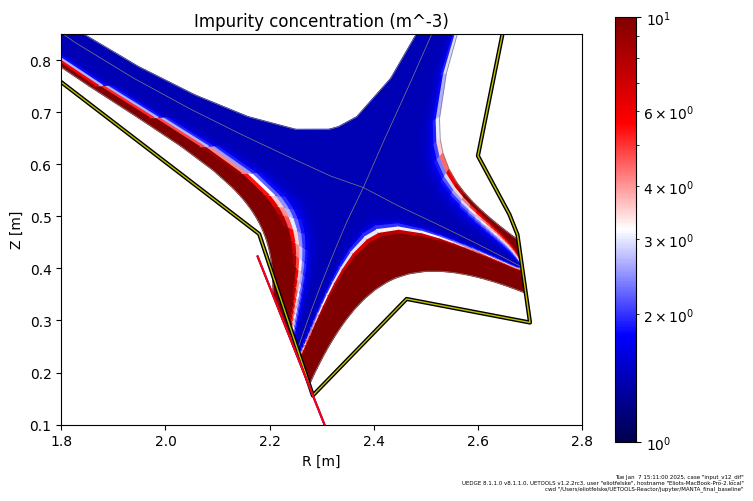

In [12]:

nD = bbb.ni.transpose()
nT = nD[1] # deut density - atomic density
nD = nD[0] # deut density - ion density
nT = nT.transpose()
nD = nD.transpose()
zeff = (nT+nD+(bbb.na*10))/bbb.ne
c.plot.mesh(
    zeff, 
    log=True, 
    xlim=(1.8, 2.8), 
    ylim=(0.1,0.85), 
    figsize=(7,5), 
    zrange=(1,10),
    cmap='seismic',
    title='Impurity concentration (m^-3)'
);
bbb.minu[0]

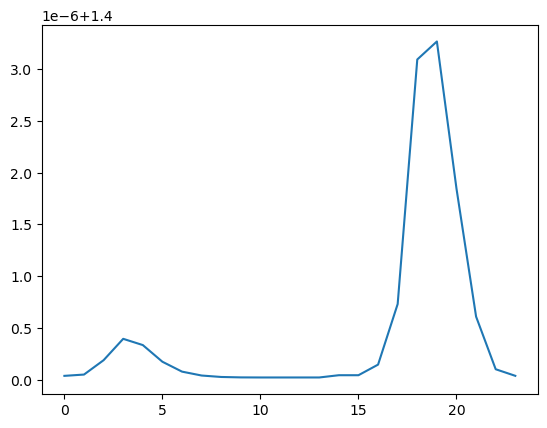

array([1.40000004, 1.40000005, 1.40000019, 1.40000039, 1.40000033,
       1.40000017, 1.40000008, 1.40000004, 1.40000003, 1.40000002,
       1.40000002, 1.40000002, 1.40000002, 1.40000002, 1.40000004,
       1.40000004, 1.40000015, 1.40000073, 1.40000309, 1.40000327,
       1.40000184, 1.40000061, 1.4000001 , 1.40000004])

In [15]:
y = zeff[17:41,2]
plt.plot(y)
plt.show()
y

# Power Calculations

In [14]:
c = Case('reconverged_v12_p3.93_n2.38_imp5e3_dp0.06_kep0.06_kip0.06_last_ii2.hdf5')

Restoring case from HDF5 file:
  Rate dirs read from .uedgerc
  Grid read from .../jupyter/MANTA_final_baseline/reconverged_v12_p3.93_n2.38_imp5e3_dp0.06_kep0.06_kip0.06_last_ii2.hdf5
  User-specified diffusivities read from HDF5 file ".../jupyter/MANTA_final_baseline/reconverged_v12_p3.93_n2.38_imp5e3_dp0.06_kep0.06_kip0.06_last_ii2.hdf5"
UETOOLS-style save successfully restored from .../jupyter/MANTA_final_baseline/reconverged_v12_p3.93_n2.38_imp5e3_dp0.06_kep0.06_kip0.06_last_ii2.hdf5
*** For isimpon=2, set afracs, not afrac ***

*** UEDGE arrays populated: Warning, case may noy be fully converged ***
fnrm without preconditioning: 94.4



In [61]:
from scipy.integrate import simpson
bbb.fqp=0
bbb.plateflux();

pcore = simpson( (bbb.feiy+bbb.feey)[com.ixpt1[0]+1:com.ixpt2[0]+1,0]) / 1e6
psep = simpson( (bbb.feiy+bbb.feey)[com.ixpt1[0]+1:com.ixpt2[0]+1,com.iysptrx]) / 1e6

print(f' Power from core boundary (surface closest to magnetic axis) = {pcore:.3f} MW  \n \
Power at Separatrix = {psep:.3f} MW  \n \
Power radiated in core region = {(pcore-psep):.3f} MW = {((abs(pcore-psep)/pcore)*100):3f}%')
particlecore = simpson( (bbb.fniy)[com.ixpt1[0]+1:com.ixpt2[0],0])

pleft = simpson( (bbb.feiy+bbb.feey)[com.ixpt1[0]+1:32,com.iysptrx]) / 1e6
pright = simpson( (bbb.feiy+bbb.feey)[32:com.ixpt2[0]+1,com.iysptrx]) / 1e6
print(f'From LCFS, {(pright/pleft):.3f} times more power going out into high field side than low field side\n Left:{pleft} MW | Right: {pright} MW')

 Power from core boundary (surface closest to magnetic axis) = 65.568 MW  
 Power at Separatrix = 10.484 MW  
 Power radiated in core region = 55.084 MW = 84.009907%


IndexError: index -1 is out of bounds for axis 0 with size 0

In [ ]:
impFracs = [1e-4, 3e-3, 3e-2]
pRads = [33.11, 33.9, 42.5]

In [21]:
bbb.ismctab

1

In [7]:
Case().search.var("nzdf")


Package:    com
Group:      Share
Attributes: Share 
Type:       integer
Address:    124608842386816
Unit:       
Comment:
number of impurity b2frates-format data files


In [33]:
len(bbb.te[28])

46